In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Diwali Sales Data.CSV', encoding='unicode_escape')


In [16]:
df.shape

(11251, 15)

In [17]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [24]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [26]:
df.isnull

<bound method DataFrame.isnull of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

     

In [36]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [35]:
df.dropna(inplace= True)

In [37]:
df['Amount']=df['Amount'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


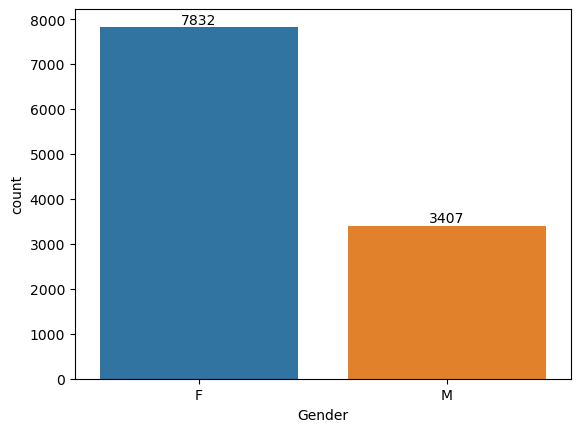

In [42]:
ax= sns.countplot(x='Gender', data=df)
for bars in ax.containers: ax.bar_label(bars)
    # it goes to each bar in the plot and adds a label to show the count value on top of each bar.

<Axes: xlabel='Gender', ylabel='Amount'>

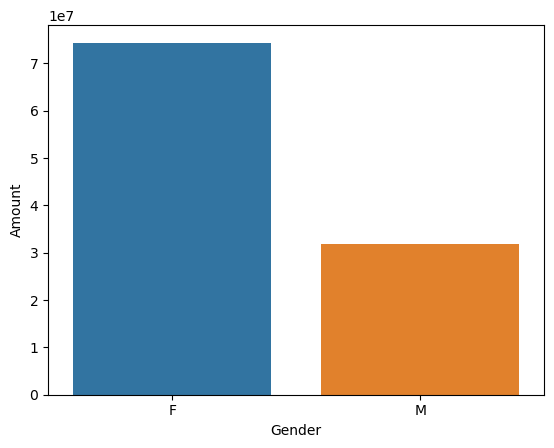

In [46]:
salesgen =df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.barplot(x='Gender', y='Amount', data= salesgen)
    

In [47]:
#From the above graph we see that most of the buyers are female and even the purchasing power of females are greater than men.


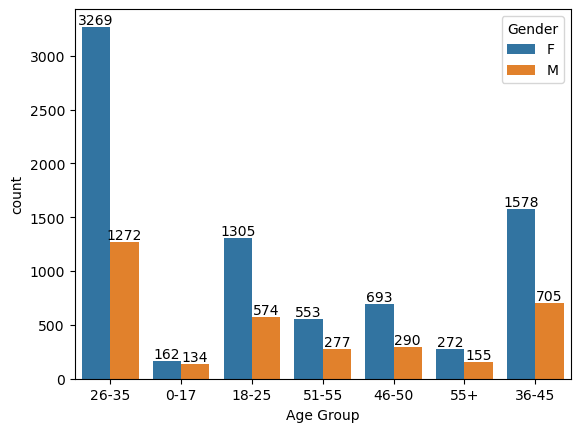

In [53]:
ax =sns.countplot(x="Age Group", data= df, hue = 'Gender')
for bars in ax.containers : 
        ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

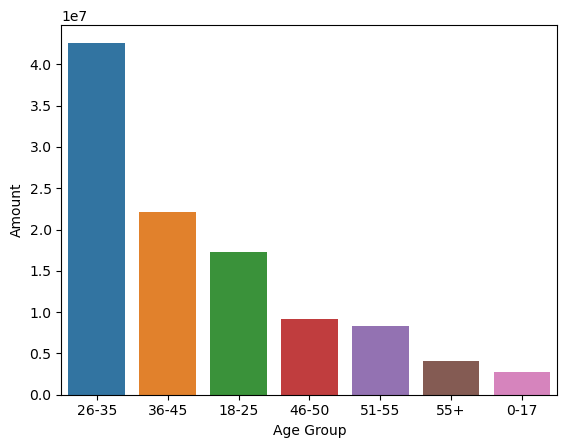

In [54]:
sales_age=df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x= 'Age Group', y= 'Amount', data = sales_age)

In [55]:
#from the above graph we can interpret that most of the buyers are of age group between 26-35 females. 


<Axes: xlabel='State', ylabel='Orders'>

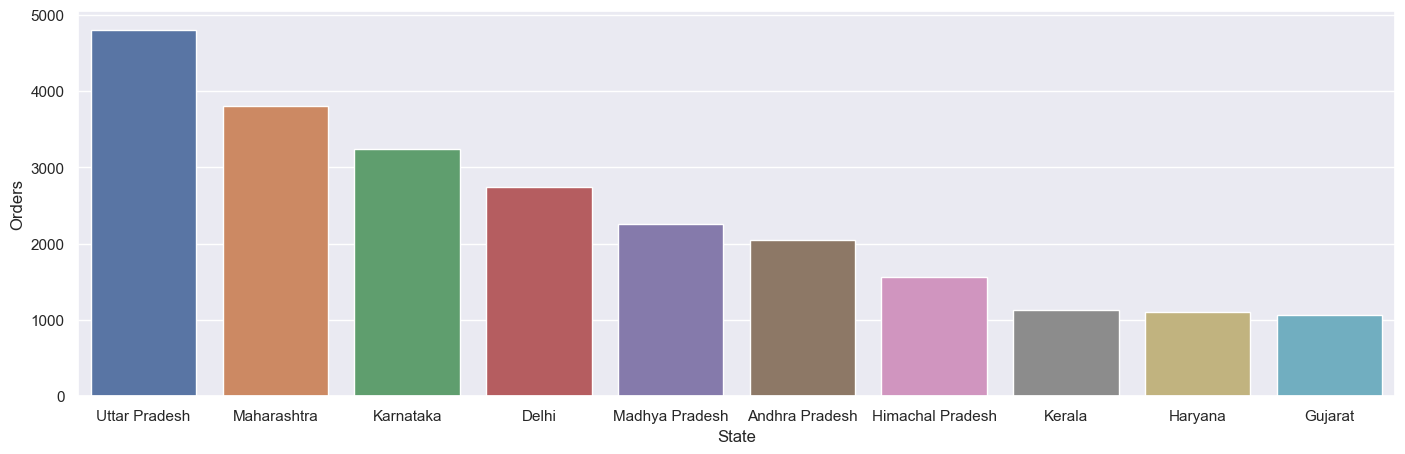

In [62]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(17, 5)})
sns.barplot(x='State', y='Orders', data=sales_state)



In [63]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Amount'>

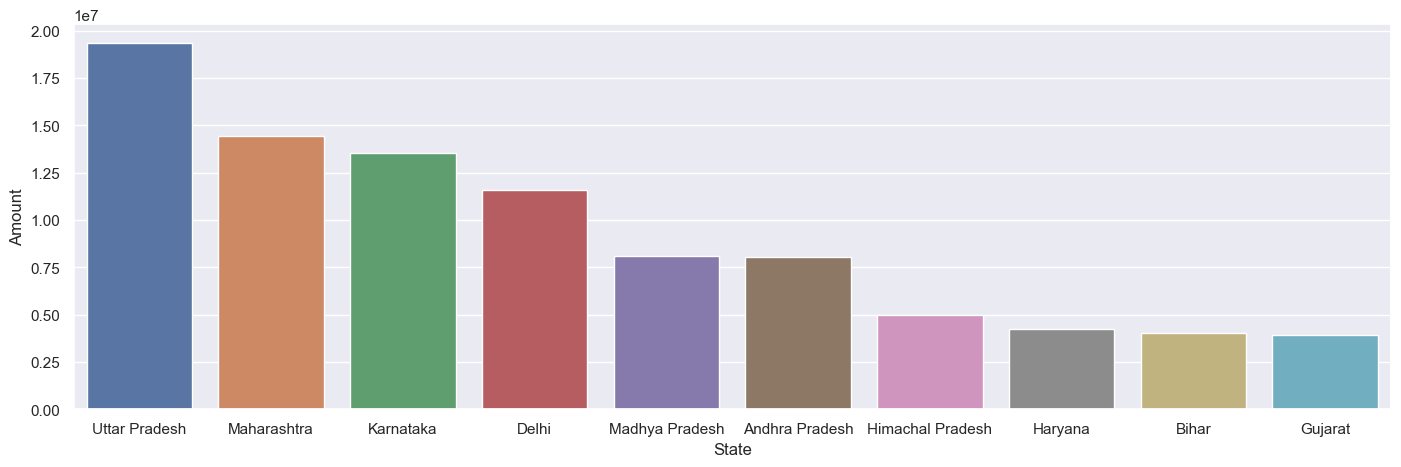

In [89]:
sales_state_amount = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(17, 5)})
sns.barplot(x='State', y='Amount', data=sales_state_amount)

In [65]:
#from the above graph we can see that most orders are from Uttar Pradesh, Maharastra and Karnataka respectively 

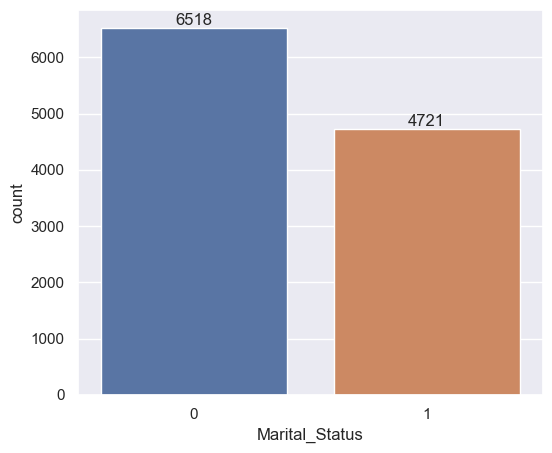

In [72]:
ax=sns.countplot(data=df, x='Marital_Status')
sns.set(rc={'figure.figsize':(6, 4)})
for bars in ax.containers:
    ax.bar_label(bars)

In [68]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

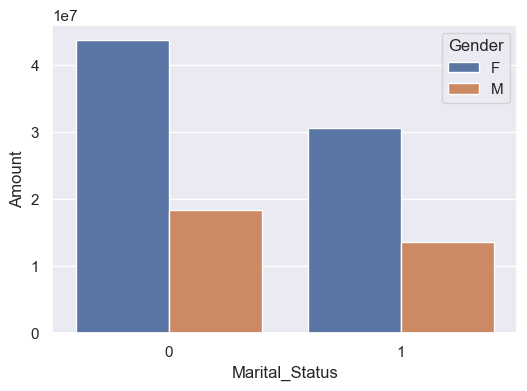

In [79]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6, 4)})
sns.barplot(x='Marital_Status', y='Amount', data=sales_state, hue ='Gender')

In [82]:
# more buyers are females those who are married

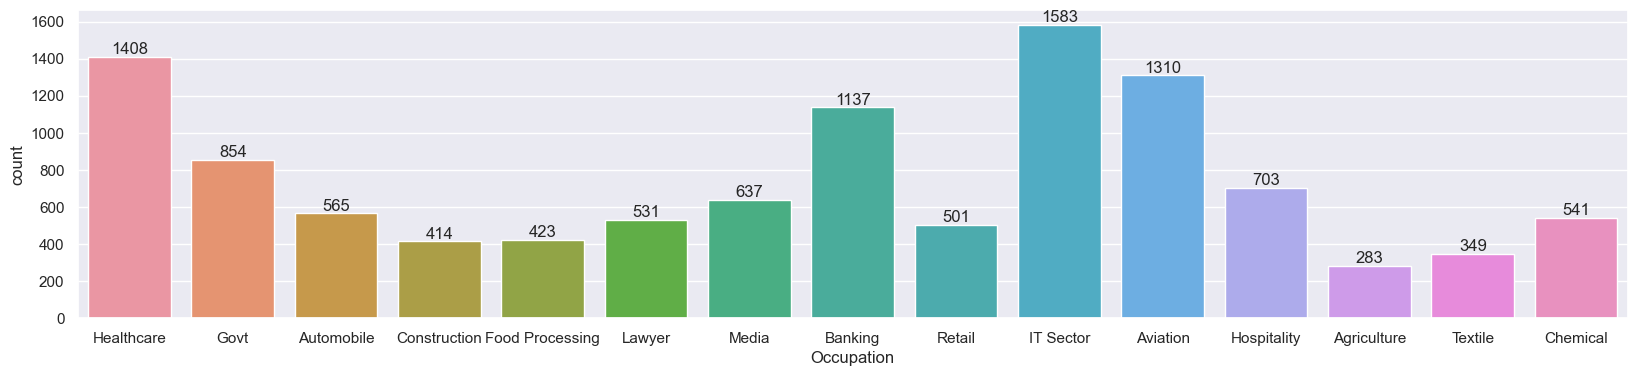

In [84]:
ax=sns.countplot(data=df, x='Occupation')
sns.set(rc={'figure.figsize':(20, 5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

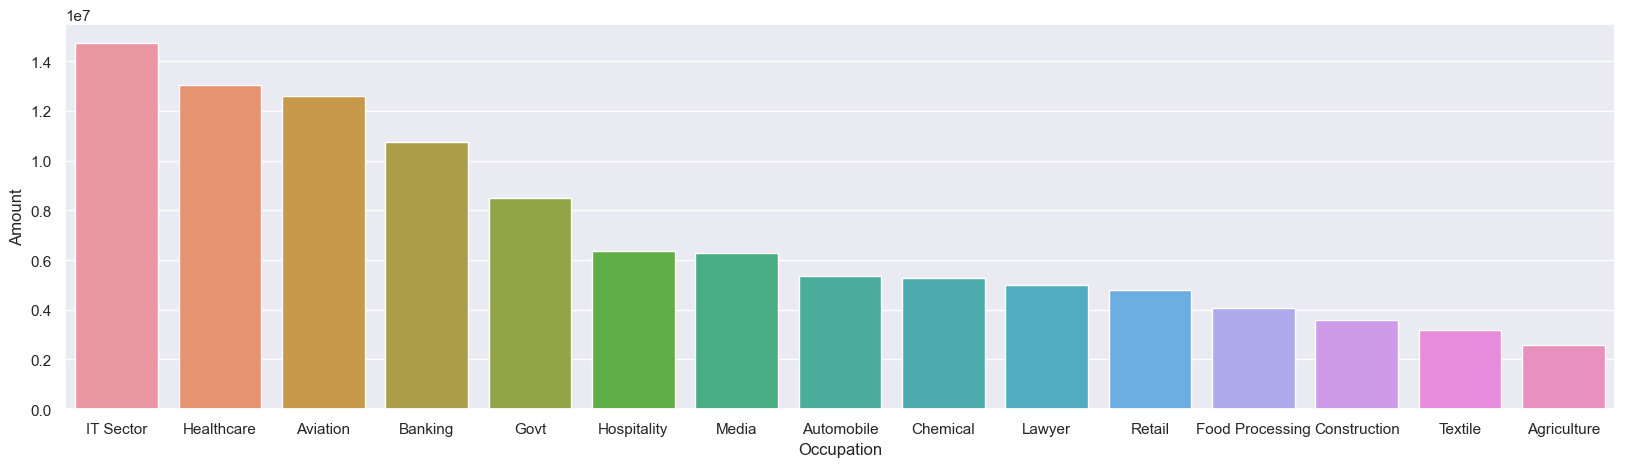

In [88]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20, 5)})
sns.barplot(x='Occupation', y='Amount', data=sales_state)

In [90]:
# from the above graph we can see that most buyers are working in IT, Avaition and healthcare sector


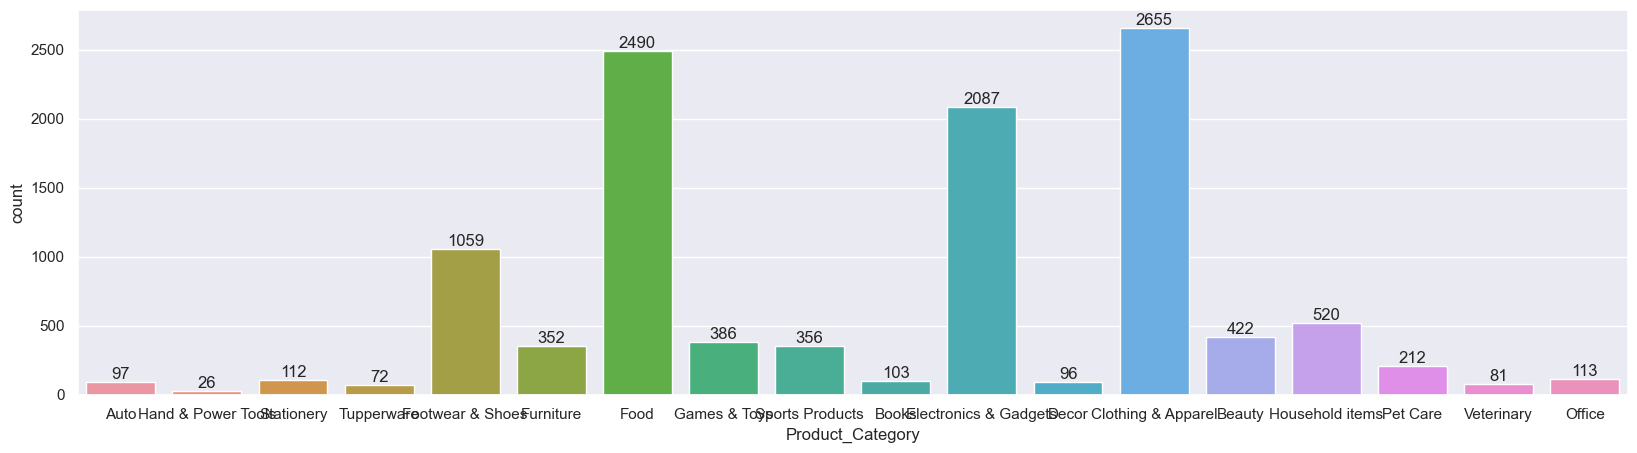

In [93]:
ax=sns.countplot(data=df, x='Product_Category')
sns.set(rc={'figure.figsize':(20, 7)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

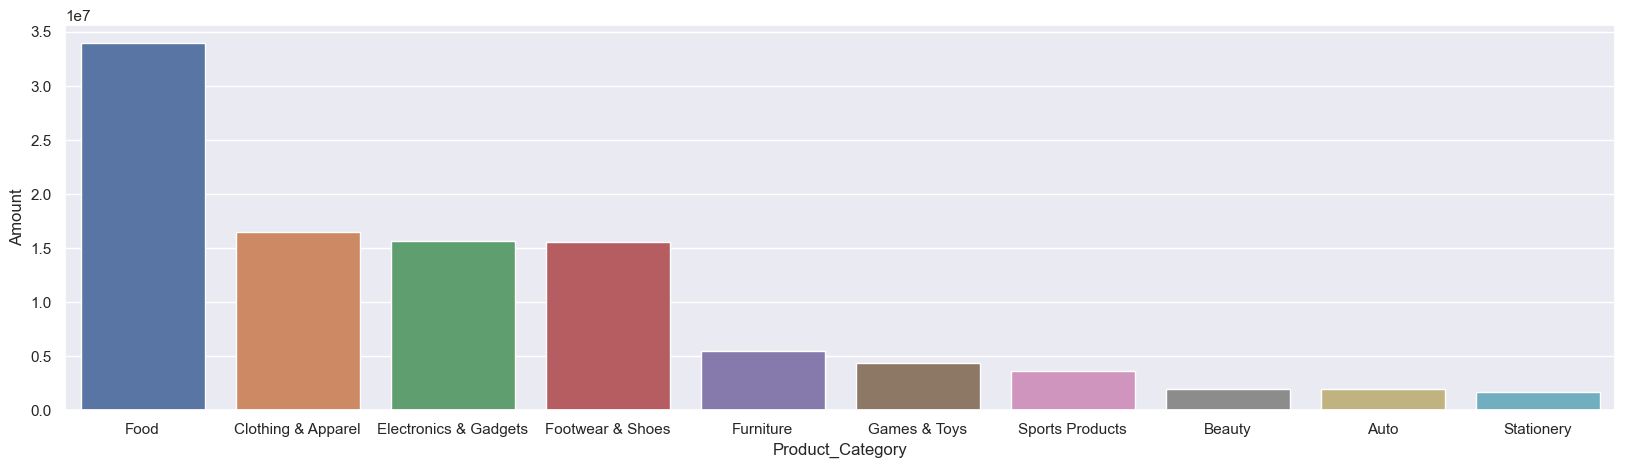

In [95]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20, 5)})
sns.barplot(x='Product_Category', y='Amount', data=sales_state)

In [97]:
#from the above graph we can see that the category food has got the highest total amount generated followed by clothing & apparel, electronics & gadgets*


# Conclusion

Most Women aged 26-35years from UP, Maharastra, and Karnataka working in IT, Healthcare, and aviation are more likely to buy products from food, clothing and electronics